## RuntimeError: Optimal parameters not found
RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = xxx<br><br>
maxfev will vary from one machine to the next

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline 
from scipy.optimize import curve_fit
import os

Directory housekeeping

In [20]:
basedir = '/home/david/gh/intro_curve_fitting_python'

try:
    os.chdir(basedir)
except:
    print('\n\nproblem changing to the directory you specified; does it exist?\nthe kernel will now restart; rerun this program.\n\n')
    quit()

In the '.../intro_curve_fitting_python/exponential_data' directory you will find the following files:

In [21]:
filenames = os.listdir(basedir+'/exponential_data/')
filenames

['exponential2.csv', 'exponential3.csv', 'exponential1.csv']

It should not be too difficult to adapt your work from the linear fitting exercises to these data sets.<br><br>To get you started, I will define an appropriate fitting function. Note, however, that you will have to customize it to fit data set 3. If you get stuck with that, check out the [notebook](./generate_datasets.ipynb) with which I created the data, or view it as a [webpage](./generate_datasets.html).

In [22]:
def genexpfunc(x, a, k, c):
    return c+a*np.exp(k*x)

Read and scatter plot exponential1.csv

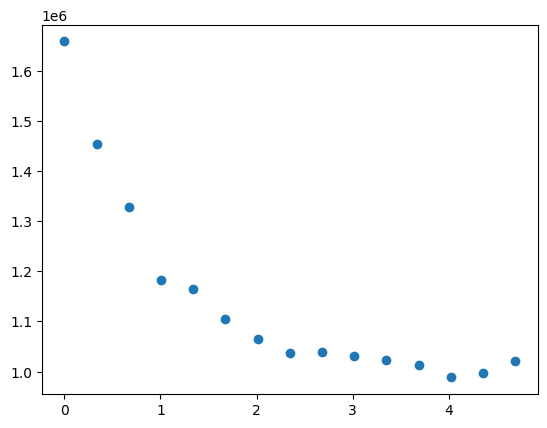

In [23]:
# dataset linear1.csv
fn = basedir+'/exponential_data/exponential1.csv'

x = []
y = []

inf = open(fn)

for line in inf:
    line = line.rstrip()
    la = line.split(',')
    x.append(float(la[0]))
    y.append(float(la[1]))

inf.close()

x=np.array(x)
y=np.array(y)

plt.scatter(x,y)
plt.show()

Attempt the curve fit

In [24]:
popt, pcov = curve_fit(genexpfunc, x, y)

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

The fitting routine expects to succeed in optimizing the parameters within 800 iterations. If it doesn't this happens. Usually this is a sign of a more serious problem. Sometimes, however, simply increasing the maxfev parameter can resolve the problem. Let's make it enormous:

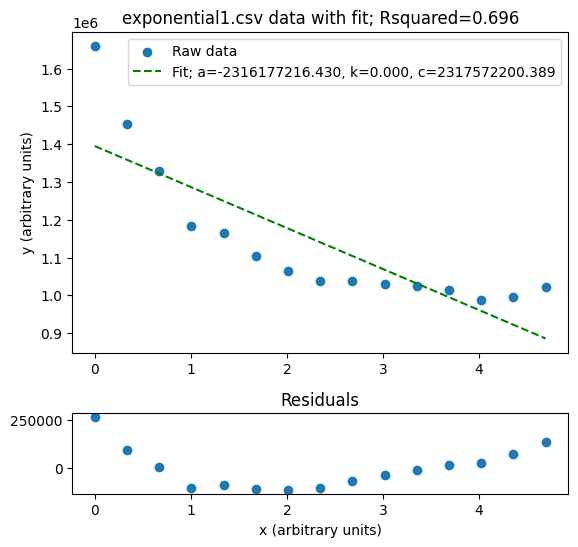

In [26]:
popt, pcov = curve_fit(genexpfunc, x, y, maxfev=100000)

residuals = y-genexpfunc(x, *popt)

rsq = 1 - np.sum(np.square(residuals))/np.sum(np.square(y-np.mean(y)))

fig = plt.figure()

fig.set_figwidth=(4)
fig.set_figheight(6)

spec = gridspec.GridSpec(ncols=1, nrows=2,
						hspace=0.3, height_ratios=[4, 1])

ax0 = fig.add_subplot(spec[0])
ax0.scatter(x,y, label='Raw data')
ax0.plot(x, genexpfunc(x, *popt), 'g--',
         label='Fit; a=%0.3f, k=%0.3f, c=%0.3f' % tuple(popt))
ax0.set_ylabel('y (arbitrary units)')
ax0.set_title('exponential1.csv data with fit; Rsquared=%0.3f' % rsq)
ax0.legend()

ax1 = fig.add_subplot(spec[1])
ax1.set_title('Residuals')
ax1.set_xlabel('x (arbitrary units)')
ax1.scatter(x, residuals)

# display and save the figure
plt.show()

And, Houston, we've had this problem before; [here]() is the solution. 